# PyEumap - Temporal Gap-filling Demonstration

In this tutorial we will fill `nodata` gaps in a series of rasters, using a time-series median strategy provided in `pyeumap.gapfiller`.

First, let's download some data.

In [1]:
from pyeumap import datasets

datasets.TILES

['22497_sweden', '9529_croatia']

We will use a LANDSAT raster time-series for Croatia.

In [2]:
tile = datasets.TILES[1]
datasets.get_data(tile+'_rasters.zip')

658.52 MB downloaded, unpacking...                    
Download complete.


Now, let's define the time-series intervals and connect them to the raster datasets.

In [3]:
from pathlib import Path
import os

data_root = datasets.DATA_ROOT_NAME
tile_dir = Path(os.getcwd()).joinpath(data_root, tile) # pyeumap.datasets.get_data() downloads to the current working directory by default

def get_landsat_images(season, band, perc):
    return sorted(tile_dir.glob(f'**/*landsat*{season}*{band}*{perc}*.tif'))

# we will use the 50th percentile of the LANDSAT NIR band provided in the eumap datasets
band = 'nir'
perc = 'p50'

# the eumap data is aggregated by season
seasons = (
    'winter',
    'spring',
    'summer',
    'fall',
)

fn_times_layers = {
    season: get_landsat_images(season, band, perc)
    for season in seasons
}

fn_times_layers['winter'][:5]

[PosixPath('/home/luka/eumap/eumap_data/9529_croatia/2000/landsat_ard_winter_nir_p50.tif'),
 PosixPath('/home/luka/eumap/eumap_data/9529_croatia/2001/landsat_ard_winter_nir_p50.tif'),
 PosixPath('/home/luka/eumap/eumap_data/9529_croatia/2002/landsat_ard_winter_nir_p50.tif'),
 PosixPath('/home/luka/eumap/eumap_data/9529_croatia/2003/landsat_ard_winter_nir_p50.tif'),
 PosixPath('/home/luka/eumap/eumap_data/9529_croatia/2004/landsat_ard_winter_nir_p50.tif')]

After we have defined our timeseries, we can fill the gaps using `pyeumap.gapfiller.TimeGapFiller`. The gap filler will build a `gapfilled` directory in the current working directory by default, and output the gap-filled rasters there.

In [4]:
from pyeumap import gapfiller

filler = gapfiller.TimeGapFiller(fn_times_layers, time_order=seasons)
filler.run()

[00:25:44] Reading 21 layers on winter
[00:25:45] Data shape: (1000, 1000, 21)
[00:25:45] Reading 21 layers on spring
[00:25:45] Data shape: (1000, 1000, 21)
[00:25:45] Reading 20 layers on summer
[00:25:45] Data shape: (1000, 1000, 20)
[00:25:45] Reading 20 layers on fall
[00:25:46] Data shape: (1000, 1000, 20)
[00:25:46] Filling the gaps with long-term median for winter
[00:25:47] Filling the gaps with long-term median for spring
[00:25:48] Filling the gaps with long-term median for summer
[00:25:49] Filling the gaps with long-term median for fall
[00:25:55] Filling the gaps with long-term median for all time series
[00:25:55] Saving the results


Finally, we can check the results of the gap-filling using the `pyeumap.plotter` module.

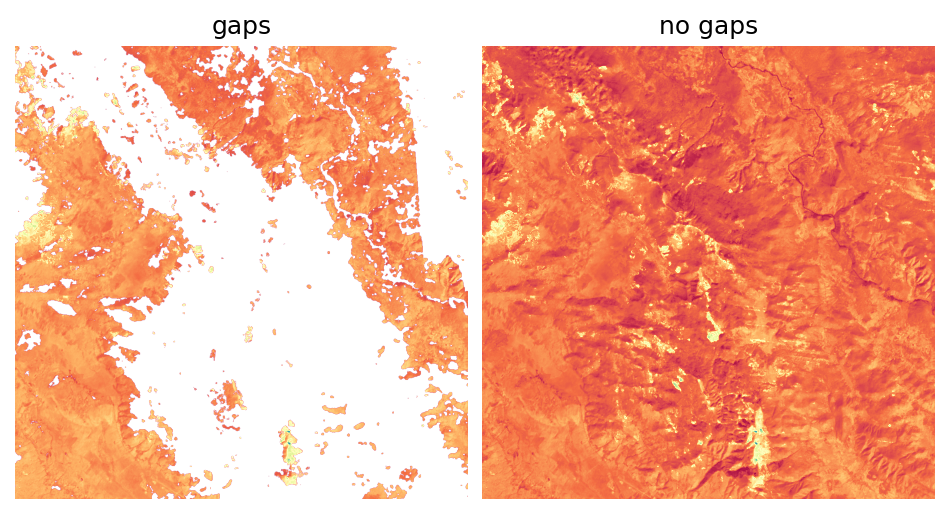

In [5]:
from pyeumap import plotter

image_with_gaps = fn_times_layers['winter'][0]
gapfilled_image = filler.timeseries_fn[0]

plotter.plot_rasters(
    image_with_gaps,
    gapfilled_image,
    cmaps='Spectral',
    figsize=8,
    titles=['gaps', 'no gaps'],
)

This approach enables us to apply spatial and spatiotemporal modeling and mapping even on datasets heavily burdened by cloud cover and other interference.